## Données manquantes

<div style=\\\"border:1px solid black; padding:10px; background-color: #F8F8F8>
   <b>Notions et fonctions</b>,
Les notions et procédures apparaissant pour la première fois dans le cours sont suivies d'un astérisque"
<ul>
<li> Anayse des correspondances multiples *</li>
 <li> traet des données manquantes </li>
<li> description des variables qualitatives présentes dans un dataframe *</li>
<li>Corrélation de Cramer V</li>
<li> Matrice de Cramer_V</li>
<li>Correction de Yates</li>
<li> Création d'une fonction python</li>
</ul>
<strong> Comme d'habitude certaines cellules sont dépendantes de cellules précédentes. Il faut donc les éxécuter en suivant leur ordre dans la page</strong>

## Import des bibliothèques

In [1]:
import numpy as np 
import pandas as pd 
import scipy.stats as stats
import seaborn as sns 
import matplotlib.pyplot as plt

## Construction du dataframe

In [2]:
import pandas as pd

# Chemin du fichier
chemin_fichier = 'Doc9/romancoin.xlsx'

# Lecture du fichier Excel dans un DataFrame pandas
df = pd.read_excel(chemin_fichier)

# Affichage des premières lignes du DataFrame pour vérification
print(df.head())


          Empress Empress2 Empress3  \
0  Annia Faustina      NaN      NaN   
1  Annia Faustina      NaN      NaN   
2  Annia Faustina      NaN      NaN   
3  Annia Faustina      NaN      NaN   
4  Aquilia Severa      NaN      NaN   

                                           URI                  Title  \
0  http://numismatics.org/ocre/id/ric.4.el.399  RIC IV Elagabalus 399   
1  http://numismatics.org/ocre/id/ric.4.el.233  RIC IV Elagabalus 233   
2  http://numismatics.org/ocre/id/ric.4.el.232  RIC IV Elagabalus 232   
3  http://numismatics.org/ocre/id/ric.4.el.206  RIC IV Elagabalus 206   
4  http://numismatics.org/ocre/id/ric.4.el.227  RIC IV Elagabalus 227   

       RecordId   Authority  Degree      Deity Denomination  ... Object Type  \
0  ric.4.el.399  Elagabalus     NaN        NaN   Sestertius  ...        Coin   
1  ric.4.el.233  Elagabalus     NaN        NaN    Medallion  ...   Medallion   
2  ric.4.el.232  Elagabalus     NaN        NaN     Denarius  ...        Coin   
3  ric

<p style=\"text-align:justify;\">
Notre jeu de données décrit ici des frappes de pièces émises sous la dynastie des Sévères qui présida fort longtemps aux destinées de l'emepreur romain. Les descriptifs prêtent une attention particuière à la présence de figures féminines, impératices ou divinités. </br>,
Le tableau de données comporte presuqu'exclusivement des variables qualitatives, certaines décrivant avec un grand luxe de détail les inscriptions portées sur les pièces. </br>,
Il est assez typique des données issues d'une enquête historique, ou sociologique d'ailleurs, un nombre conséquent, de quelques centaines à quelques milliers d'objets (ici des frappes monétaires) est décrit par un assez grand nombre de variables. Ces matrices de taille moyenne (nous sommes loin de l'échelle des big data) comportent très fréquemment des valeurs non numériques (string ou chaîne de caractère) et comportent assez fréquemment d'assez grandes zones creuses (c'est à dire de valeurs manquantes). </br>,
Nous le vérifions au moyen des outils descriptifs déjà vus dans un cours précédent. </p>

## Décrire le tableau de données

In [3]:
# Pour chaque colonne dans les colonnes du DataFrame
for col in df.columns:
    # Imprime le nom de la colonne et son type
    print(f"{col}: {df[col].dtype}")
    # Nous obtenons pour chaque colonne son nom et son type


Empress: object
Empress2: object
Empress3: object
URI: object
Title: object
RecordId: object
Authority: object
Degree: float64
Deity: object
Denomination: object
Dynasty: object
Issuer: float64
Material: object
Mint: object
Obverse Legend: object
Obverse Type: object
Object Type: object
Portrait: object
Reference: float64
Region: object
Motherhood: object
Classification: object
Reverse Legend: object
Reverse Type: object
Year: object
Date Record Modified: object


In [4]:
# Obtention d'une description des variables qualitatives\n",
description_qualitative = df.describe(include=[object]),
  
# Affichage de la description\n",
print(description_qualitative)

(         Empress Empress2    Empress3  \
count       1339        7           3   
unique        16        3           1   
top     Faustina   Maesa?  Sallustia?   
freq         393        3           3   

                                                URI                  Title  \
count                                          1340                   1340   
unique                                         1319                   1319   
top     http://numismatics.org/ocre/id/ric.4.el.395  RIC IV Elagabalus 395   
freq                                              2                      2   

            RecordId        Authority  Deity Denomination  Dynasty  ...  \
count           1340             1340   1091         1302     1311  ...   
unique          1319               17     67           12        8  ...   
top     ric.4.el.395  Marcus Aurelius  Venus     Denarius  Severan  ...   
freq               2              202    208          302      580  ...   

                          

<p style=\"text-align:justify;\">
    1340 frappes sont décrites par 23 variables presque toutes sont des variables qualitatives. <br>
Plusieurs varaibles sotn très peu remplies, pourront donc difficilement être prises en compte pour l'analsye (empress 2, empress 3) quelques unes (obverse type, reverse type) soit les inscriptions portées à l'avers et au revers, comportent un très grand nombre de modalités. Exploiter les informations fournies par ces colonnes supposerait un important travail de recodage qui nécessite une connaissacne experte du domaine et des objets décrits. En effet la plupart des méthodes d'analyse de grands tableaux et de clustering (les analyses factorielles par exemple) sont très sensisbles aux écarts importants dans le nombre des modalités des variables prises en compte. </br>
Nous sommes confrontés à une tâche classique pour l'historien, qui doit décider de la façon dont il va traiter les données manquantes 
Une analsye exploratoire, surtout si elle menée sans expertise, écartera donc ces variables.</p>

## Gestion des données manquantes

<p style=\"text-align:justify;\">
Lorsque nous sommes confrontés à un fichier comportant de nombreuses données manquantes nous avons le choix entre trois stratégies qui peuvent d'ailleurs se combiner
<ul><li>Supprimer certains secteurs de la matrice. Nous pouvons décider de ne pas prendre en compte certaines colonnes trop peu remplies, ou certaines lignes, soit des individus sur lesquels nous savons très peu de choses. L'un n'empêchant paautre. L'avantage est que la plupart des méthodes d'anlyse s'accomodent assez mal de la donnée manquante. C'est d'une certaine façon la méthode la plus simple et le choix le plus fréquent. L'inconvénient est que nous perdons une partie de l'information contenue dans le tableau</li>
<li>Extrapolation. Dans certains cas il est possible de rcer la donée manquante par une donnée extrapolée à partir de ce que nous savons d'autre sur un individu. C'est généralement lorsque nous disposons de données quantitatives que nous procédons à cette opératio, soit en attribuant des valeurs \"neutres\" (souvnet calculées partir de la moyenne ou de la médaine) aux cases manquantes, ce qui permet de conserver des individus pour lesquels manquent quelques informations sans que nous ayons de raion de penser qu'ils diffèrent sous le regard des autres. Dans d'autres cas, la valeur manquante peut être prédite parce qu'existent de forts liens entre plusieurs variables. Dans le cas des variables qualitatives il peut être possible d'appliquer cette méthode dans certains cas mais elle suppose une connaissance fine des données et donc de ce qui est décrit.</li>
<li>Nous pouvons enfin attribuer une valeur propre au manque d'information. On remplacera  les données manquantes par une valeur conventionelle (une chaîne de caractère). Cela permet de conserver plus d'individus lorsque l'on passe à l'analyse. Cele se justifie aussi parce que dans certains cas le manque d'information est en lui même une information. il petu peut signaler une particularité des conditions d'enregistrement de l'information (des ménages étrangers peuvent être peu décrits par un agent recenseur parce qu'il ne parvient pas à comprendre les réponses faites à ses quesitons ) ou des caractéristiques des indivuds qui font que certains éléments de description ne sont pas pertinents (la taille du jardin pour un appartement). L'inconvénient est que les données manquantes peuvent signaler des invidus aux particularités très spécifiques et être nombreuses, l'analyse (en particulier dans le cas d'analayses factorielles) enregistrera alors surtout la présence de cette populations particulière</li>C'est cette dernière méthode que nous appliquons ici, en partie par manque de connaissance contexte et de l'objet, en partie pour en montrer la mise en oeuvre qui est simple.</li></ul></p>
   

In [5]:
# Identifier les colonnes qualitatives et quantitatives
colonnes_qualitatives = df.select_dtypes(include=['object', 'category']).columns.tolist()
colonnes_quantitatives = df.select_dtypes(include=[np.number]).columns.tolist()

# Remplacer les données manquantes dans les colonnes qualitatives par 'manque
#
df.fillna(value={col: 'manque' for col in colonnes_qualitatives}, inplace=True)
df.fillna(value={col: 0 for col in colonnes_quantitatives}, inplace=True)

# Remplacer les données manquantes dans les colonnes quantitatives par une valeur numérique
print(df.head())


          Empress Empress2 Empress3  \
0  Annia Faustina   manque   manque   
1  Annia Faustina   manque   manque   
2  Annia Faustina   manque   manque   
3  Annia Faustina   manque   manque   
4  Aquilia Severa   manque   manque   

                                           URI                  Title  \
0  http://numismatics.org/ocre/id/ric.4.el.399  RIC IV Elagabalus 399   
1  http://numismatics.org/ocre/id/ric.4.el.233  RIC IV Elagabalus 233   
2  http://numismatics.org/ocre/id/ric.4.el.232  RIC IV Elagabalus 232   
3  http://numismatics.org/ocre/id/ric.4.el.206  RIC IV Elagabalus 206   
4  http://numismatics.org/ocre/id/ric.4.el.227  RIC IV Elagabalus 227   

       RecordId   Authority  Degree      Deity Denomination  ... Object Type  \
0  ric.4.el.399  Elagabalus     0.0     manque   Sestertius  ...        Coin   
1  ric.4.el.233  Elagabalus     0.0     manque    Medallion  ...   Medallion   
2  ric.4.el.232  Elagabalus     0.0     manque     Denarius  ...        Coin   
3  ric

In [6]:
# Je ne conserve que les colonnes qui ne comportent pas un trop grand nombre de modalités
# j'enlève les colonnes donnant des éléments non mobilisables pour l'analyse (urrl de la source, identifiant etc),

# Liste des colonnes à conserver,
colonnes_a_conserver = ['Empress', 'Authority', 'Degree', 'Deity', 'Denomination', 'Object Type', 'Portrait', 'Region', 'Motherhood', 'Classification', 'Year']

# Création d'un nouveau DataFrame avec uniquement les colonnes sélectionnées,
df2 = df[colonnes_a_conserver]

# Afficher les premières lignes du nouveau DataFrame pour vérifier,
print(df2.head())

          Empress   Authority  Degree      Deity Denomination Object Type  \
0  Annia Faustina  Elagabalus     0.0     manque   Sestertius        Coin   
1  Annia Faustina  Elagabalus     0.0     manque    Medallion   Medallion   
2  Annia Faustina  Elagabalus     0.0     manque     Denarius        Coin   
3  Annia Faustina  Elagabalus     0.0     manque       Aureus        Coin   
4  Aquilia Severa  Elagabalus     0.0  Concordia     Denarius        Coin   

                    Portrait Region Motherhood Classification     Year  
0   Anna Faustina|Elagabalus  Italy     manque         manque      221  
1   Anna Faustina|Elagabalus  Italy     manque         manque      221  
2   Anna Faustina|Elagabalus  Italy     manque         manque      221  
3  Elagabalus|Annia Faustina  Italy     manque         manque  218|222  
4             Aquilia Severa  Italy     manque       Dynastic  220|222  


<p style=\"text-align:justify;\">
Dans le cadre des études historiques, plus généralement des sciences sociales, la méthode d'analyse la plus commune lorsque l'on est confronté à ce type de tableau est l'Analyse des correspondances multiples (ou ACM). Celle-ci fait partie des outils disponibles pour une analsye exploratoire des données sans hypothèses interpratatives préalables (même si ce n'est jamais tout à fait vrai dans la pratique). </br>
Si cependant il existe des bibliothèques Python dédiées à l'ACM (la plus élaborée et la mieux entreteneue se nomme prince) celles-ci sont bien loin de la qualité et de la richesse des bibliothèques dispoibles sous R (en partiuclier FactomineR). </br>
Il est possible de d'incorporer des traitemenst R à un carnet Jupyter mais cela suppose de mettre en oeuvre un environnement dédié du fait de conflits possibles entre les bibliothèques nécessaires et celles permettant l'analyse de données. </br>
Nous évoquerons donc l'ACM dans un autre cadre. </br>
Celle-ci en effet si elle est la plus connue et la plus utilisée des techniques exploratoires multivariées adaptées à ce genre de fichier est loin d'être la seule, et d'autres ont fait l'objet d'intéressants développements Python. </p>
Nous allons ici utiliser des technniques d'analayse destinées à nous permettre de déterminer si les informations manquantes sont distribuées au hasard dans notre data frame ou bien correspondent à certains types d'individus. </p>

In [7]:
import pandas as pd

# Supposons que df2 est votre DataFrame déjà chargé

# Initialisation du dictionnaire pour stocker les fréquences
frequences_manque = {}
# Calcul du nombre total de lignes dans le DataFrame
total_lignes = len(df2)

# Itération sur chaque colonne du DataFrame pour calculer les fréquences de "manque"
for colonne in df2.columns:
    # Compte le nombre de fois que "manque" apparaît dans la colonne
    nb_manque = (df2[colonne] == 'manque').sum()
    # Calcule la fréquence en divisant par le nombre total de lignes
    frequences_manque[colonne] = nb_manque / total_lignes

# Convertit les résultats en DataFrame pour un affichage clair
frequences_manque_df = pd.DataFrame(list(frequences_manque.items()), columns=['Variable', 'Fréquence de "manque"'])

# Affiche les fréquences d'apparition de "manque"
print(frequences_manque_df)


          Variable  Fréquence de "manque"
0          Empress               0.000746
1        Authority               0.000000
2           Degree               0.000000
3            Deity               0.185821
4     Denomination               0.028358
5      Object Type               0.000000
6         Portrait               0.000000
7           Region               0.000000
8       Motherhood               0.653731
9   Classification               0.338806
10            Year               0.000000


<p style=\"text-align:justify;\">
Les données manquantes sont très inégalement réparties, seules trois variables en comportent un nombre important (Deity, Denomination, Motherhood). Nous allons tenter de déterminer si ces vaeurs manquantes sont distribuées au hasard dans le data frame. </br>

### Coefficient de Cramer_v

Le coefficient de Cramér V est défini comme suit :,

$$
V = \sqrt{\frac{\chi^2}{n \cdot \min(k - 1, r - 1)}}
$$

où :
- chi2 est la statistique du Chi-carré issue du test d'indépendance,
- n est le nombre total d'observations,
- k est le nombre de colonnes dans le tableau de contingence,
- r est le nombre de lignes dans le tableau de contingence.

La valeur de V varie de 0 à 1, où 0 indique aucune association entre les variables catégorielles, et 1 indique une association parfaite. </br>
Elaboré par Harald Cramer en 1946, mathématicien suédois, universitaire, mais aussi expert aurpès de compagnies d'assurances très soucieuses d'estimer, risques et facteurs de risque, et disposant de tables de survie comportant de nombreuses lignes mais assez peu d'informations sur chaque individu, il n'est que l'une des mesures possibles de la force de l'association etnre variables qualitatives.</br>
Il est particulièrement efficace dans le cas de tables de petites tailles (des modalités en nombre limitées) et de populations d'assez grande taille. Les statisticiens contemporains conseillent dans le cas de matrices de grande taille et/ou de populations de taille modeste, d'utiliser une correction (Bergsma, Wicher (2013). "A bias correction for Cramér's V and Tschuprow's T". Journal of the Korean Statistical Society. 42 (3): 323–328. doi:10.1016/j.jkss.2012.10.002), considérant que la valeur donnée par Kramer V conduit l'observateur à surestimer l'importance de l'association dans ces contextes. </br>
Les corrections proposées par divers auteurs sont assez nombreuses et diveres. L'une des plus connues (ci-dessous) est la correction de Yates, intégrée, parfois par défaut dans les fonctions disponibles calculant le chi2. Elle revient, dans le cas des tables 2x2 à soustraire 0,5 à chacune des valeurs préentes dans le tableau comparant distirbution attendue et distribution effective, avant de procéder au calcul du chi 2.La formule permettant le calcul du chi2 est alors : 
Nous utilisons dans la fonction ci-dessous la correction de Yates, cela revient à soustraire 0,5 à chacune des valeurs préentes dans le tableau comparant distirbution attendue et distribution effective, avant de procéder au calcul du chi 2.La formule permettant le calcul du chi2 est alors :,
Avec la correction de Yates, la formule du test du chi-carré pour un tableau de contingence 2x2 est :
$$
\chi^2 = \sum \frac{(|O - E| - 0.5)^2}{E}
$$

où 
- O représente les fréquences observées dans chaque cellule du tableau,
- E est les fréquences attendues calculées sous l'hypothèse d'indépendance des variables
- 0.5$ est la valeur de correction de continuité appliquée pour ajuster pour la discrétion de la distribution des données dans les petits échantillons.

Cela rend le test plus conservateur, particulièrement pour les tableaux décrivant des échantillons de petite taille, par des tableaux 2X2. Les opinions divergent sur l'effet en d'autres contextes. Nous souhaitons donc ne pas l'utiliser ici pour disposer d'un outil peu dépendant du contexte (de la forme des données) et supportant des tables d'assez grande taille. </br>
Cela suppose de renseigner l'un des arguments de la fonction chi2 (code ci-dessous)et d'appliquer une autre correction destinée à renforcer la robustesse des résultats particulièrement dans le cas de tableau de données comportant des matrices de tailles et de formes très différentes, qui prend en compte la taille et la forme de la matrice. ,
 
Pour les curieux voici le détail des calculs :

La fonction calculant le coefficient de Cramér's V prend en compte une correction pour les dimensions de la table de contingence. La formule exacte utilisée dans cette fonction, exprimée en notation mathématique, est :

$$V = \sqrt{\frac{\phi^2_{corr}}{\min(k - 1, r - 1)}}$$,

où :

- V est le coefficient de Cramér's V, une mesure normalisée de l'association entre deux variables catégorielles qui varie de 0 (pas d'association) à 1 (association parfaite).,

- $$\phi^2_{corr}$$ est une version corrigée de $$\phi^2$$, qui est elle-même la statistique du chi-carré $$\chi^2$$ normalisée par le nombre total d'observations $n$ :

    $$ \phi^2 = \frac{\chi^2}{n} $$

La correction appliquée à $\\phi^2$ pour obtenir $\\phi^2_{corr}$ tient compte des dimensions de la table de contingence (nombre de lignes $r$ et de colonnes $k$) et ajuste $\\phi^2$ pour minimiser le biais potentiel dû à la taille de la table :

$$ \phi^2_{corr} = \max\left(0, \phi^2 - \frac{(k-1)(r-1)}{n-1}\right)$$
   
- k et r sont, respectivement, le nombre de colonnes et le nombre de lignes dans la table de contingence.,

- n est le nombre total d'observations.,

La correction dans $$\phi^2_{corr}$$ est spécialement conçue pour ajuster $$\\phi^2$$ en soustrayant un terme qui dépend du nombre de lignes r, du nombre de colonnes k, et du nombre total d'observations n. Cet ajustement aide à réduire le biais qui pourrait survenir dans le calcul de $$\\phi^2$$ pour les grandes tables de contingence ou celles avec un nombre disproportionné de lignes et de colonnes, ce qui est souvent le cas dans un fichier issu d'une enquête de sciences sociales, particulièrement d'une enquête historique.

Cette formule, qui ne porte pas de nom spécifique, mais est un mode de calcul assez usité, donne une mesure robuste de la force et de la direction de l'association entre deux variables catégorielles, ajustée pour la taille et la forme de la table de contingence, rendant le coefficient de Cramér's V applicable et fiable dans une large gamme de situations.

L'important n'est pas le détail des forumules, mais la compréhension de la nature des transformations et des ajustements et l'idée que les <b>outils et les techniques statistiques ne sont pas censées être des procédures mécaniquement appliquées</b> quel que soit le contexte d'usage mais tirent leur pertinence et leur intérêt de leur ajustement aux données que l'on travaille et aux questions que l'on pose. </br>
Cela rend le test plus conservateur, particulièrement pour les tableaux décrivant des échantillons de petite taille, ou des tableaux 2X2, sans affecter beaucoup les valeurs dans les autres cas. Intégrer la correction dès la définition de la fonction revient à disposer d'un outil utilisable en plus de contextes sans avoir à le réajuster selon les conditions d'usage.

In [8]:
 %%writefile cramers_v.py


from scipy.stats import chi2_contingency
import pandas as pd 
import numpy as np
   
# nous utilions une Magic command (c'est officiellement son nom) des carnets jupyter pour créer une fonction externe
  # Elle pourra être importée et utilisée dans n'importe quel carnet
# Il existe des fonctions dans certaines bibliothèques permettant le calcul de Cramer_V
# Les utiliser nous contraindrait à importer une autre bibliothèque pour un usage unique, ce qu'il est de bonne pratique d'éviter
# Et surtout nous n'aurions pas l'occasion de donner un exemple de création de fonction

def cramers_v(x, y):


    """
    Calcul de la corrélation de Cramér's V pour deux séries catégorielles.
    - x, y : séries pandas catégorielles.
    
    Retourne la corrélation de Cramér's V entre x et y, sans appliquer la correction de Yates.
    """
    # Création d'une matrice de contingence
    confusion_matrix = pd.crosstab(x, y)
    # Calcul de la statistique Chi2 sans correction de Yates
    chi2 = chi2_contingency(confusion_matrix, correction=False)[0]
    
    # Nombre total d'observations
    n = confusion_matrix.sum().sum()
    # Calcul de phi2
    phi2 = chi2 / n
    # Nombre de lignes et de colonnes dans la matrice de contingence
    r, k = confusion_matrix.shape
    # Correction de phi2 pour les tailles des tableaux de contingence
    phi2_corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    # Corrections pour les degrés de liberté ajustés
    r_corr = r - ((r-1)**2)/(n-1)
    k_corr = k - ((k-1)**2)/(n-1)
    # Calcul et retour du coefficient de Cramér's V
    return np.sqrt(phi2_corr / min((k_corr-1), (r_corr-1)))



Overwriting cramers_v.py


La programmation Python (comme toute programmation) procède par assemblement de modules simples. La fonction ici n'a qu'une tâche à accomplir, calculer un coefficient de Cramer. Nous pourrions y intégrer les éléments permettant de construire la matrice des corrélations et de visualiser la heatmap, mais nous perdrions en lisibilité et en réutilisabilité.

In [9]:
from cramers_v import cramers_v

# Calcul du coefficient de Cramér's V entre 'colonne1' et 'colonne2'
resultat = cramers_v(df2['Deity'], df2['Authority'])

# Affichage du résultat
print("Coefficient de Cramér's V :", resultat)


Coefficient de Cramér's V : 0.25499349961678225


Nous vérifions que nous pouvons bien utiliser cette nouvelle fonction

Nous calculons cette valeur pour tous les croisemnts de variables et construisons une représentation graphique des résultats

Matrice de Corrélation de Cramér's V :
                 Empress  Authority     Deity  Denomination  Object Type  \
Empress         1.000000   0.741145  0.255938      0.368216     0.205840   
Authority       0.741145   1.000000  0.254993      0.380802     0.289070   
Deity           0.255938   0.254993  1.000000      0.208567     0.507426   
Denomination    0.368216   0.380802  0.208567      1.000000     0.794419   
Object Type     0.205840   0.289070  0.507426      0.794419     1.000000   
Portrait        0.961913   0.844562  0.118131      0.455485     0.420161   
Region          0.361252   0.478407  0.210381      0.293982     0.000000   
Motherhood      0.358405   0.368799  0.534503      0.291557     0.197829   
Classification  0.340657   0.348108  0.605077      0.198461     0.304780   
Year            0.902331   0.930696  0.083460      0.477292     0.734297   

                Portrait    Region  Motherhood  Classification      Year  
Empress         0.961913  0.361252    0.358405   

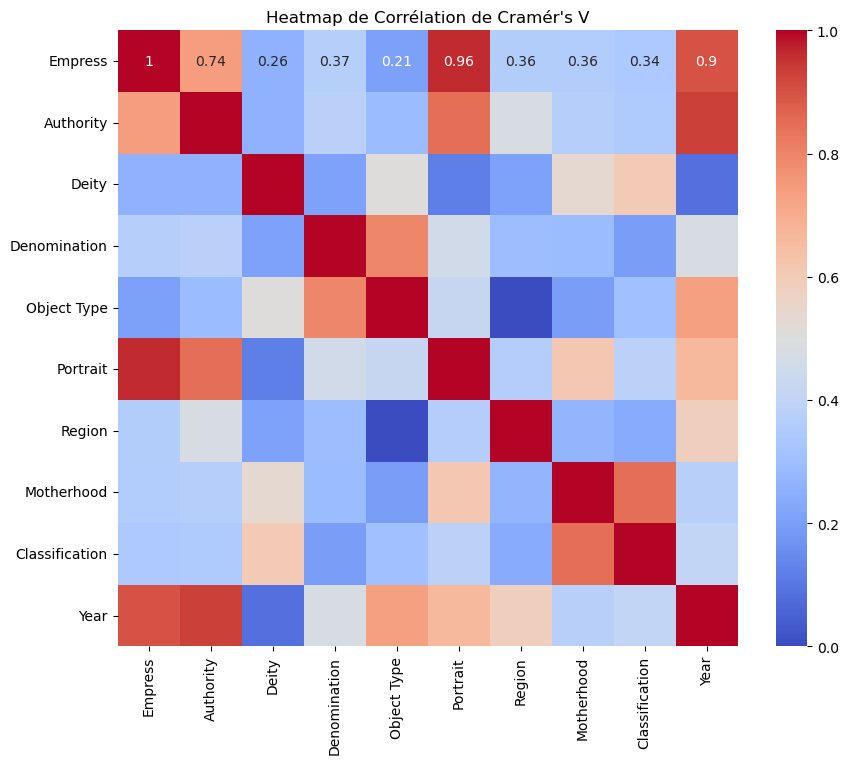

In [10]:
from cramers_v import cramers_v
# Supposons que 'df2' est votre DataFrame chargé
# Sélection des colonnes catégorielles
variables_catégorielles = df2.select_dtypes(include=['object']).columns

# Initialisation de la matrice des corrélations de Cramér's V
cramers_v_matrix = pd.DataFrame(index=variables_catégorielles, columns=variables_catégorielles, dtype=float)

# Calcul de la matrice de corrélation de Cramér's V
for col1 in variables_catégorielles:
    for col2 in variables_catégorielles:
        cramers_v_matrix.loc[col1, col2] = cramers_v(df2[col1], df2[col2])

# Affichage de la matrice de corrélation de Cramér's V
print("Matrice de Corrélation de Cramér's V :")
print(cramers_v_matrix)

# Visualisation de la heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cramers_v_matrix, annot=True, cmap="coolwarm")
plt.title("Heatmap de Corrélation de Cramér's V")
plt.show()


<p style=\"text-align:justify;\">L'étude de la heatmap permet de vérivier qu'il n''y a pas d'orthogonalité entre les varaibles (elles ne sont pas indépendantes les unes des autres. De plus la date de l''émission monétaire est manifestement corrélée à de nombreuses variables, qu'il y a donc des variations de type selon le temps. Ces deux constats ne peuvent que rassurer l'historien. C'est le signe que ce fichier comporte des informations exploitables par le spécialiste. </br>
    "Pour ce qui est des variables comportant de nombreuses données manquantes, elles n'apparaissent pas très fortement corréles à des variables structurant l'information, ce qui est là aussi plutôt rassurant. Il faut cependant le vérifier dans le cas spécifique des données manquantes.</p>